# Physics 5300 Final Problem Set - Gravitational Orbits in Cartesian Coordinates

#### Cassie Moats

*2b: In this plot, I can see that the larger, more massive body (whose rest frame we're in) is located around 0,0 and, relative to that body, there is m2 orbiting just as we've seen with single orbits in class.*

*transfer equations here as markdown*

In [1]:
# import statements

%matplotlib inline

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
class GravitationalOrbit:
    """
    ADD INFO
    
    Parameters
    ----------
    m_1 : float
    m_2 : float
    G : float
    
    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    
    def __init__(self, m1=1., m2=1., G=1.):
        self.m1 = m1
        self.m2 = m2
        self.G = G
    
   
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        z : float
            3-component vector with:
                z[0] = x1(t) and z[1] = x1dot(t)
                z[2] = x1(t) and z[3] = x1dot(t)
                z[4] = x2(t) and z[5] = x1dot(t)
                z[6] = x2(t) and z[7] = x1dot(t)
                
        Returns
        -------
            
        """
        r = np.sqrt((z[0] - z[4])**2 + (z[2] - z[6])**2)
        return [z[1], self.G*self.m2*(z[4] - z[0])/r**3,
               z[3], self.G*self.m2*(z[6] - z[2])/r**3,
               z[5], -self.G*self.m1*(z[4] - z[0])/r**3,
               z[7], -self.G*self.m1*(z[6] - z[2])/r**3]
    
    def solveODE(self, t_pts, z0,
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """
        
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z0, t_eval=t_pts, method='RK23', 
                             atol=abserr, rtol=relerr)
        x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot = solution.y
        return x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot
    
    def solve_ode_Leapfrog(self, t_pts, z_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0 = z0
        
        # initialize the arrays for r, rdot, r_dot_half, phi with zeros
        num_t_pts = len(t_pts)
        
        x1 = np.zeros(num_t_pts)
        x1dot = np.zeros(num_t_pts)
        x1dot_half = np.zeros(num_t_pts)
        
        y1 = np.zeros(num_t_pts)
        y1dot = np.zeros(num_t_pts)
        y1dot_half = np.zeros(num_t_pts)
        
        x2 = np.zeros(num_t_pts)
        x2dot = np.zeros(num_t_pts)
        x2dot_half = np.zeros(num_t_pts)
        
        y2 = np.zeros(num_t_pts)
        y2dot = np.zeros(num_t_pts)
        y2dot_half = np.zeros(num_t_pts)
        
        # initial conditions
        x1[0] = x1_0
        x1dot[0] = x1dot_0
        
        y1[0] = y1_0
        y1dot[0] = y1dot_0
        
        x2[0] = x2_0
        x2dot[0] = x2dot_0
        
        y2[0] = y2_0
        y2dot[0] = y2dot_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            z = [x1[i], x1dot[i], y1[i], y1dot[i], x2[i], x2dot[i], y2[i], y2dot[i]]
            out = self.dz_dt(t,z)
            
            x1dot_half[i] = x1dot[i] + out[1]*delta_t/2.
            x1[i+1] = x1[i] + x1dot_half[i]*delta_t
            
            y1dot_half[i] = y1dot[i] + out[3]*delta_t/2.
            y1[i+1] = y1[i] + y1dot_half[i]*delta_t
            
            x2dot_half[i] = x2dot[i] + out[5]*delta_t/2.
            x2[i+1] = x2[i] + x2dot_half[i]*delta_t
            
            y2dot_half[i] = y2dot[i] + out[7]*delta_t/2.
            y2[i+1] = y2[i] + y2dot_half[i]*delta_t
            
            z = [x1[i+1], x1dot[i], y1[i+1], y1dot[i], x2[i+1], x2dot, y2[i+1], y2dot[i]]
            out = self.dz_dt(t,z)
            
            x1dot[i+1] = x1dot_half[i] + out[1]*delta_t/2.
            y1dot[i+1] = y1dot_half[i] + out[3]*delta_t/2.
            x2dot[i+1] = x2dot_half[i] + out[5]*delta_t/2.
            y2dot[i+1] = y2dot_half[i] + out[7]*delta_t/2.
            
        return x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot  
    
    def solve_ode_Leapfrog_n(self, t_pts, z_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method. Generalized for n points.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for r, rdot, r_dot_half, phi with zeros
        num_t_pts = len(t_pts)
        n_total = len(z0)
        z = np.zeros(shape=(n_total, num_t_pts))
        dot_half = np.zeros((int(n_total/2)))
        
        # initial conditions
        z[:,0] = z0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            z_now = z[:,i]
            out = np.asarray(self.dz_dt(t,z_now)) # converting to numpy array
            
            dot_half = z_now[1::2] + out[1::2]*delta/2                  
            z[0::2, i+1] = z_now[0::2] + dot_half*delta_t
            
            z_now[0::2] = z[0::2] + dot_half*delta_t
            out = np.asarray(self.dz_dt(t,z_now))
                              
            z[1::2, i+1] = dot_half + out[1::2]*delta_t/2.
            
        return z 

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line    

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [5]:
# labels for plot axes 
orbitLabels = (r'$t$', r'$y$')

# plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

In [6]:
# set values for variables for orbit 1
G = 1.
m1 = 1.
m2 = 5. 

orbit1 = GravitationalOrbit(m1=m1, m2=m2, G=G) # using above values in the GravitationalOrbit method

x1_0, x1dot_0 = 1., -1 # setting inital x1 value and initial rate of change of x1
y1_0, y1dot_0 = 1., 1. # setting inital y1 value and initial rate of change of y1
x2_0, x2dot_0 = -(m1/m2)*x1_0, -(m1/m2)*x1dot_0 # setting the initial x2 value and initial rate of change of x2
y2_0, y2dot_0 = -(m1/m2)*y1_0, -(m1/m2)*y1dot_0 # setting inital y2 value and initial rate of change of y2

# taking the above initializations to define the overall initial z position and rate of change
z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0] 

# from the orbit produced above, use the range of time and initalized z position and rate of change 
# with to solve the ODE for the values as time passes
# returns arrays for each value
x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot = orbit1.solveODE(t_pts, z0)

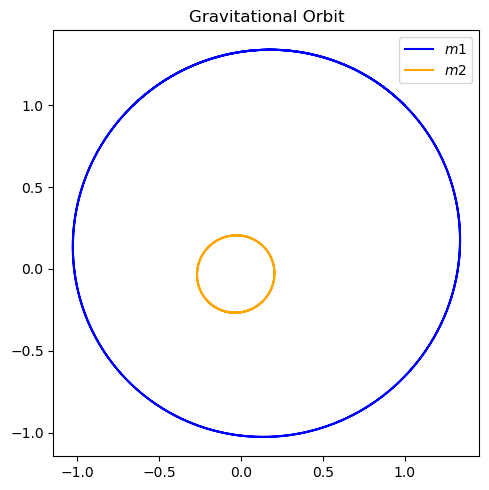

In [7]:
# starting the figure
fig = plt.figure(figsize=(5,5))

# first plotting the orbit
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)   
ax.plot(x1, y1, color='blue', label=r'$m1$') 
ax.plot(x2, y2, color='orange', label=r'$m2$') 
ax.set_title('Gravitational Orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()

In [8]:
t_start = 0.
t_end = 20.
delta_t = 0.00001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

In [9]:
# using different masses to illustrate that when one of the bodies is a heavy mass 
# nd we look at it's rest frame that it reduces to what we've done before

G = 20.
m1 = 20.
m2 = 1. 

orbit1 = GravitationalOrbit(m1=m1, m2=m2, G=G)

x1_0, x1dot_0 = 0.1, 0.
y1_0, y1dot_0 = 0., 0.75
x2_0, x2dot_0 = -(m1/m2)*x1_0, -(m1/m2)*x1dot_0 # in M1 rest frame
y2_0, y2dot_0 = -(m1/m2)*y1_0, -(m1/m2)*y1dot_0 # in M1 rest frame

z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0]
x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot = orbit1.solveODE(t_pts, z0)

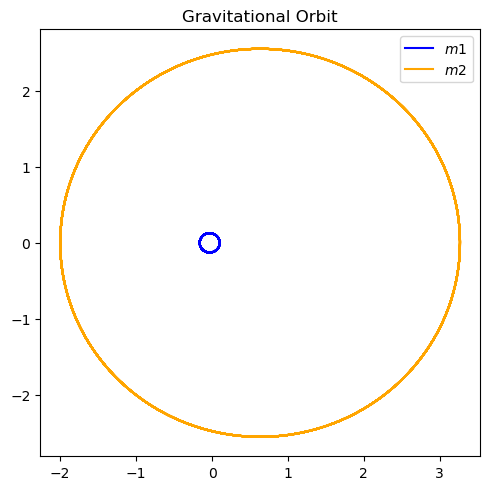

In [10]:
# starting the figure
fig = plt.figure(figsize=(5,5))

# first plotting the orbit
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x1, y1, color='blue', label=r'$m1$')  
ax.plot(x2, y2, color='orange', label=r'$m2$') 
ax.set_title('Gravitational Orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()

In [11]:
t_start = 0.
t_end = 500.
delta_t = 0.1

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

In [12]:
G = 10.
m1 = 1.
m2 = 1. 

orbit1 = GravitationalOrbit(m1=m1, m2=m2, G=G)

x1_0, x1dot_0 = 1., 0.
y1_0, y1dot_0 = 0., 1.
x2_0, x2dot_0 = -(m1/m2)*x1_0, -(m1/m2)*x1dot_0
y2_0, y2dot_0 = -(m1/m2)*y1_0, -(m1/m2)*y1dot_0

z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0]
x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot = orbit1.solveODE(t_pts, z0)

KeyboardInterrupt: 

In [ ]:
# starting the figure
fig = plt.figure(figsize=(5,5))

# first plotting the orbit
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x1, y1, color='blue', label=r'$m1$')  
ax.plot(x2, y2, color='orange', label=r'$m2$') 
ax.set_title('Gravitational Orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()

In [ ]:
%%capture

xMin = -3.2
xMax = -xMin
yMin = -3.2
yMax = -yMin

fig_anim = plt.figure(figsize=(10,5), num='Gravitational Orbit')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(xMin, xMax)
ax_anim.set_ylim(yMin, yMax)

ln1_anim, = ax_anim.plot(x1, y1, color='blue', lw=1)
pt1_anim, = ax_anim.plot(x1[0], y1[0], 
                         "o", markersize=12, 
                         color='blue')

ln2_anim, = ax_anim.plot(x2, y2, color='orange', lw=1)
pt2_anim, = ax_anim.plot(x2[0], y2[0], 
                        "o", markersize=12, 
                         color='orange')
ax_anim.set_aspect(1)
ax_anim.axis('off')                  
fig_anim.tight_layout()

In [ ]:
def animateOrbit(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    i_skip = 1*i
    
    pt1_anim.set_data(x1[i_skip], y1[i_skip])
    pt2_anim.set_data(x2[i_skip], y2[i_skip])
    
    return (pt1_anim, pt2_anim)

In [ ]:
frame_interval = 20.  # time between frames
frame_number = 1001    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animateOrbit, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

In [ ]:
HTML(anim.to_jshtml())

In [13]:
t_start = 0.
t_end = 100.
delta_t = 0.1

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

G = 10.
m1 = 1.
m2 = 1. 

orbit1 = GravitationalOrbit(m1=m1, m2=m2, G=G)

x1_0, x1dot_0 = 1., 0.
y1_0, y1dot_0 = 0., 1.
x2_0, x2dot_0 = -(m1/m2)*x1_0, -(m1/m2)*x1dot_0
y2_0, y2dot_0 = -(m1/m2)*y1_0, -(m1/m2)*y1dot_0

z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0]
x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot = orbit1.solve_ode_Leapfrog(t_pts, z0)
x1b, x1bdot, y1b, y1bdot, x2b, x2bdot, y2b, y2bdot = orbit1.solveODE(t_pts, z0)

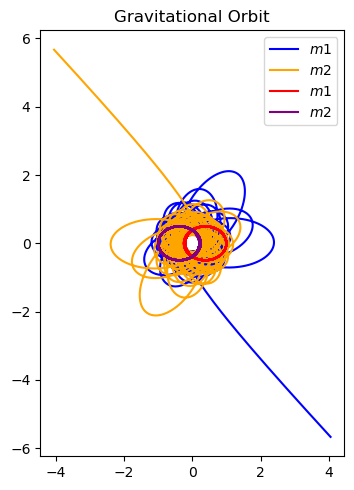

In [14]:
# starting the figure
fig = plt.figure(figsize=(5,5))

# first plotting the orbit
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x1, y1, color='blue', label=r'$m1$')  
ax.plot(x2, y2, color='orange', label=r'$m2$') 
ax.plot(x1b, y1b, color='red', label=r'$m1$')  
ax.plot(x2b, y2b, color='purple', label=r'$m2$') 
ax.set_title('Gravitational Orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()

In [15]:
class GravitationalOrbit3Body:
    """
    ADD INFO
    
    Parameters
    ----------
    m_1 : float
    m_2 : float
    m_3 : float
    G : float
    
    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    
    def __init__(self, m1=1., m2=1., m3=1., G=1.):
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.G = G
    
   
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        z : float
            12-component vector with:
                z[0] = x1(t) and z[1] = x1dot(t)
                z[2] = x1(t) and z[3] = x1dot(t)
                z[4] = x2(t) and z[5] = x1dot(t)
                z[6] = x2(t) and z[7] = x1dot(t)
                z[8] = x3(t) and z[9] = x3dot(t)
                z[10] = y3(t) and z[11] = y3dot(t)
                
        Returns
        -------
            
        """
        x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot, x3, x3dot, y3, y3dot = z
        
        r12 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        r13 = np.sqrt((x1 - x3)**2 + (y1 - y3)**2)
        r23 = np.sqrt((x2 - x3)**2 + (y2 - y3)**2)
        
        return [x1dot, self.G*self.m2*(x2 - x1)/r12**3 + self.G*self.m3*(x3 - x1)/r13**3,
                y1dot, self.G*self.m2*(y2 - y1)/r12**3 + self.G*self.m3*(y3 - y1)/r13**3,
                x2dot, self.G*self.m1*(x3 - x2)/r23**3 + self.G *self.m3*(x1 - x2)/r12**3,
                y2dot, self.G*self.m1*(y3 - y2)/r23**3 + self.G*self.m3*(y1 - y2)/r12**3,
                x3dot, self.G*self.m2*(x2 - x3)/r23**3 + self.G*self.m1*(x1 - x3)/r13**3,
                y3dot, self.G*self.m2*(y2 - y3)/r23**3 + self.G*self.m1*(x1 - x3)/r13**3]
    
    
    def solveODE(self, t_pts, z0,
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """
        
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z0, t_eval=t_pts, method='RK23', 
                             atol=abserr, rtol=relerr)
        x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot, x3, x3dot, y3, y3dot = solution.y
        return x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot, x3, x3dot, y3, y3dot
    
    def solve_ode_Leapfrog(self, t_pts, z_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0, x3, x3dot, y3, y3dot = z0
        
        # initialize the arrays for r, rdot, r_dot_half, phi with zeros
        num_t_pts = len(t_pts)
        
        x1 = np.zeros(num_t_pts)
        x1dot = np.zeros(num_t_pts)
        x1dot_half = np.zeros(num_t_pts)
        
        y1 = np.zeros(num_t_pts)
        y1dot = np.zeros(num_t_pts)
        y1dot_half = np.zeros(num_t_pts)
        
        x2 = np.zeros(num_t_pts)
        x2dot = np.zeros(num_t_pts)
        x2dot_half = np.zeros(num_t_pts)
        
        y2 = np.zeros(num_t_pts)
        y2dot = np.zeros(num_t_pts)
        y2dot_half = np.zeros(num_t_pts)
        
        x3 = np.zeros(num_t_pts)
        x3dot = np.zeros(num_t_pts)
        x3dot_half = np.zeros(num_t_pts)
        
        y3 = np.zeros(num_t_pts)
        y3dot = np.zeros(num_t_pts)
        y3dot_half = np.zeros(num_t_pts)
        
        # initial conditions
        x1[0] = x1_0
        x1dot[0] = x1dot_0
        
        y1[0] = y1_0
        y1dot[0] = y1dot_0
        
        x2[0] = x2_0
        x2dot[0] = x2dot_0
        
        y2[0] = y2_0
        y2dot[0] = y2dot_0
        
        x3[0] = x3_0
        x3dot[0] = x3dot_0
        
        y3[0] = y3_0
        y3dot[0] = y3dot_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            z = [x1[i], x1dot[i], y1[i], y1dot[i], x2[i], x2dot[i], y2[i], y2dot[i], 
                 x3[i], x3dot[i], y3[i], y3dot[i]]
            out = self.dz_dt(t,z)
            
            x1dot_half[i] = x1dot[i] + out[1]*delta_t/2.
            x1[i+1] = x1[i] + x1dot_half[i]*delta_t
            
            y1dot_half[i] = y1dot[i] + out[3]*delta_t/2.
            y1[i+1] = y1[i] + y1dot_half[i]*delta_t
            
            x2dot_half[i] = x2dot[i] + out[5]*delta_t/2.
            x2[i+1] = x2[i] + x2dot_half[i]*delta_t
            
            y2dot_half[i] = y2dot[i] + out[7]*delta_t/2.
            y2[i+1] = y2[i] + y2dot_half[i]*delta_t
            
            x3dot_half[i] = x3dot[i] + out[9]*delta_t/2.
            x3[i+1] = x3[i] + x3dot_half[i]*delta_t
            
            y3dot_half[i] = y3dot[i] + out[11]*delta_t/2.
            y3[i+1] = y3[i] + y3dot_half[i]*delta_t
            
            z = [x1[i+1], x1dot[i], y1[i+1], y1dot[i], x2[i+1], x2dot, y2[i+1], y2dot[i], 
                x3[i+1], x3dot, y3[i+1], y3dot[i]]
            out = self.dz_dt(t,z)
            
            x1dot[i+1] = x1dot_half[i] + out[1]*delta_t/2.
            y1dot[i+1] = y1dot_half[i] + out[3]*delta_t/2.
            x2dot[i+1] = x2dot_half[i] + out[5]*delta_t/2.
            y2dot[i+1] = y2dot_half[i] + out[7]*delta_t/2.
            x3dot[i+1] = x3dot_half[i] + out[9]*delta_t/2.
            y3dot[i+1] = y3dot_half[i] + out[11]*delta_t/2.
            
        return x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot, x3, x3dot, y3, y3dot
    
    def solve_ode_Leapfrog_n(self, t_pts, z_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method. Generalized for n points.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for r, rdot, r_dot_half, phi with zeros
        num_t_pts = len(t_pts)
        n_total = len(z0)
        z = np.zeros(shape=(n_total, num_t_pts))
        dot_half = np.zeros((int(n_total/2)))
        
        # initial conditions
        z[:,0] = z0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            z_now = z[:,i]
            out = np.asarray(self.dz_dt(t,z_now)) # converting to numpy array
            
            dot_half = z_now[1::2] + out[1::2]*delta/2                  
            z[0::2, i+1] = z_now[0::2] + dot_half*delta_t
            
            z_now[0::2] = z[0::2] + dot_half*delta_t
            out = np.asarray(self.dz_dt(t,z_now))
                              
            z[1::2, i+1] = dot_half + out[1::2]*delta_t/2.
            
        return z 

In [16]:
G = 10.
m1 = 1.
m2 = 1. 
m3 = 1.

orbit1 = GravitationalOrbit3Body(m1=m1, m2=m2, m3=m3, G=G)

In [17]:
x1_0, x1dot_0 = 1., 0.
y1_0, y1dot_0 = 0., -1.

x2_0, x2dot_0 = -(m1/m2)*x1_0+2, -(m1/m2)*x1dot_0+2
y2_0, y2dot_0 = -(m1/m2)*y1_0+2, -(m1/m2)*y1dot_0+2

x3_0, x3dot_0 = -(m1/m3)*x1_0*x2_0, -(m1/m3)*y1dot_0*x2dot_0
y3_0, y3dot_0 = -(m1/m3)*y1_0*x2_0, -(m1/m3)*y1dot_0*y2dot_0

z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0, x3_0, x3dot_0, y3_0, y3dot_0]
x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot, x3, x3dot, y3, y3dot = orbit1.solveODE(t_pts, z0)

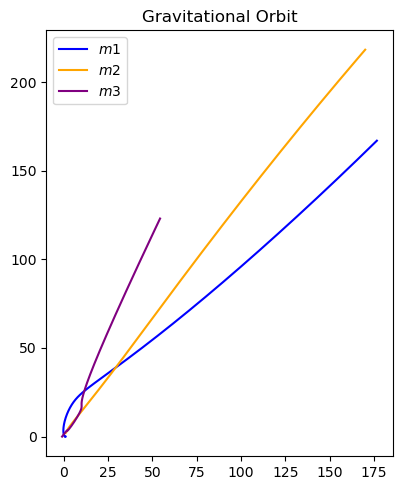

In [18]:
# starting the figure
fig = plt.figure(figsize=(5,5))

# first plotting the orbit
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x1, y1, color='blue', label=r'$m1$')  
ax.plot(x2, y2, color='orange', label=r'$m2$') 
ax.plot(x3, y3, color='purple', label=r'$m3$')
ax.set_title('Gravitational Orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()

In [19]:
x1_0, x1dot_0 = 1., 0.
y1_0, y1dot_0 = 0., -1.

x2_0, x2dot_0 = (m1/m2)*x1_0+2, (m1/m2)*x1dot_0+2
y2_0, y2dot_0 = (m1/m2)*y1_0+2, (m1/m2)*y1dot_0+2

x3_0, x3dot_0 = -(m1/m3)*x1_0*x2_0, -(m1/m3)*y1dot_0*x2dot_0
y3_0, y3dot_0 = -(m1/m3)*y1_0*x2_0, -(m1/m3)*y1dot_0*y2dot_0

z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0, x3_0, x3dot_0, y3_0, y3dot_0]
x1, x1dot, y1, y1dot, x2, x2dot, y2, y2dot, x3, x3dot, y3, y3dot = orbit1.solve_ode_Leapfrog(t_pts, z0)

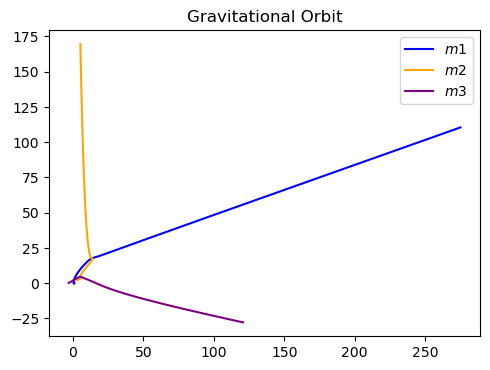

In [20]:
# starting the figure
fig = plt.figure(figsize=(5,5))

# first plotting the orbit
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
ax.plot(x1, y1, color='blue', label=r'$m1$')  
ax.plot(x2, y2, color='orange', label=r'$m2$') 
ax.plot(x3, y3, color='purple', label=r'$m3$')
ax.set_title('Gravitational Orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()